In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2 as cv
from scipy import signal

import acquire as ac
import video as v

from typing import Tuple, Union
from numpy.typing import NDArray
from dataclasses import dataclass
from collections import deque


from importlib import reload

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [79]:
df = v.get_exploration_df('videos/Banned Pokemon Seizure Scene.mp4')

In [80]:
cdf = v.get_aggregated_df(df)

In [81]:
cdf.head(3)

,lightness,hue,saturation,masked_values,light_diff,hue_diff,saturation_diff,mask_diff
frame,,,,,,,,
0,101.20,93.69,91.26,592.00,NaN,NaN,NaN,NaN
1,101.19,93.84,91.37,592.00,0.01,-0.14,-0.11,0.00
2,101.17,93.92,91.44,592.00,0.02,-0.09,-0.07,0.00


In [82]:
len(cdf)

785

In [9]:
freqencies, spectrum = signal.periodogram(
cdf.lightness,
detrend='linear',
window="boxcar",
scaling='spectrum',
)

Text(0, 0.5, 'Variance')

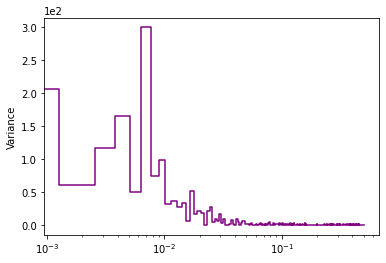

In [13]:
_, ax = plt.subplots()
ax.step(freqencies, spectrum, color="purple")
ax.set_xscale("log")
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax.set_ylabel("Variance")

In [103]:
def fourier_features(index, freq=30, order=1):
    time = np.arange(len(index), dtype=np.float32)
    k = 2 * np.pi * (1 / freq) * time
    features = {}
    for i in range(1, order + 1):
        features.update({
            f"sin_{freq}_{i}": np.sin(i * k),
            f"cos_{freq}_{i}": np.cos(i * k),
        })
    return pd.DataFrame(features, index=index)

In [15]:
len(cdf)

785

## FF for lightness

#### Pokemon video

In [84]:
ff = fourier_features(cdf.lightness, freq=30, order=1)

In [85]:
len(ff)

785

In [77]:
ff.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            287, 288, 289, 290, 291, 292, 293, 294, 295, 296],
           dtype='int64', name='frame', length=297)

<AxesSubplot: xlabel='lightness'>

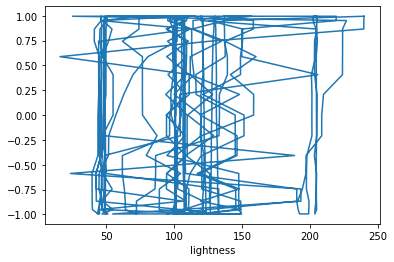

In [93]:
ff.sin_30_1.plot()

<AxesSubplot: xlabel='lightness'>

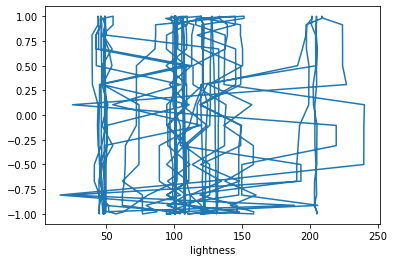

In [51]:
ff.cos_30_1.plot()

#### Hens and Dog video

In [98]:
df1 = v.get_exploration_df('videos/little hens and dog.mp4')

In [99]:
cdf1 = v.get_aggregated_df(df1)

In [55]:
ff1 = fourier_features(cdf.lightness, freq=30, order=1)

In [32]:
ff1.head(1)

,sin_5_1,cos_5_1
lightness,,
173.74,0.00,1.00


<AxesSubplot: xlabel='lightness'>

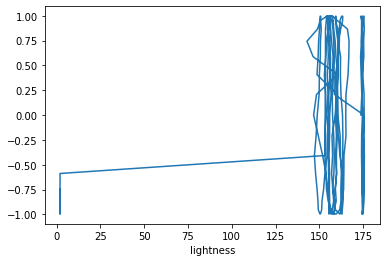

In [56]:
ff1.sin_30_1.plot()

<AxesSubplot: xlabel='lightness'>

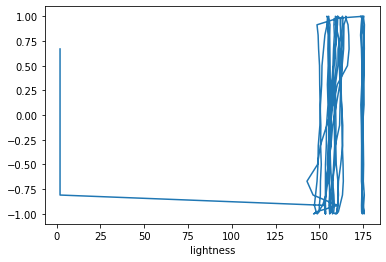

In [29]:
ff1.cos_30_1.plot()

### Blue Green Fade video

In [88]:
df2 = v.get_exploration_df('videos/Blue Green Fade.mp4')
cdf2 = v.get_aggregated_df(df2)

In [91]:
ff2 = fourier_features(cdf2.lightness, freq=30, order=1)

<AxesSubplot: xlabel='lightness'>

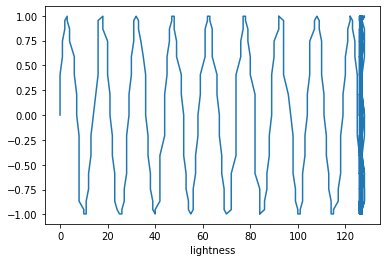

In [92]:
ff2.sin_30_1.plot()

### Difference in lighness between frames

#### Pokemon

In [94]:
ffld = fourier_features(cdf.light_diff)

<AxesSubplot: xlabel='light_diff'>

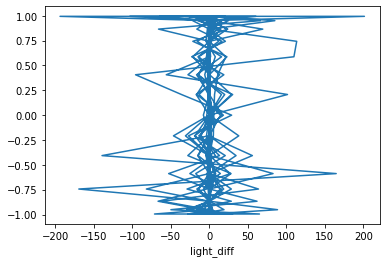

In [95]:
ffld.sin_30_1.plot()

<AxesSubplot: xlabel='light_diff'>

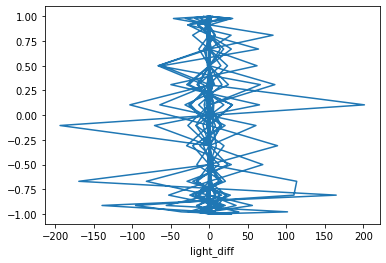

In [96]:
ffld.cos_30_1.plot()

#### Hens and Dog

In [100]:
ffld1 = fourier_features(cdf1.light_diff)

<AxesSubplot: xlabel='light_diff'>

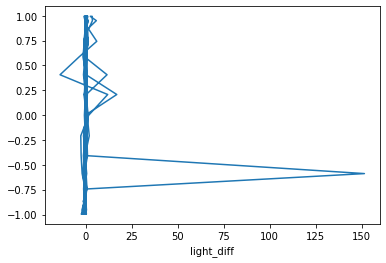

In [102]:
ffld1.sin_30_1.plot()

#### Blue Green Fade

In [105]:
ffld2 = fourier_features(cdf2.light_diff)

<AxesSubplot: xlabel='light_diff'>

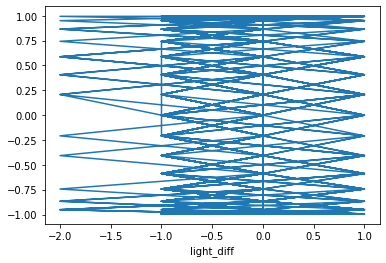

In [106]:
ffld2.sin_30_1.plot()

<AxesSubplot: xlabel='light_diff'>

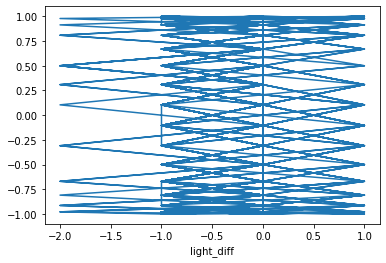

In [107]:
ffld2.cos_30_1.plot()

### Masked values

#### Pokemon

In [108]:
ffm = fourier_features(cdf.masked_values)

<AxesSubplot: xlabel='masked_values'>

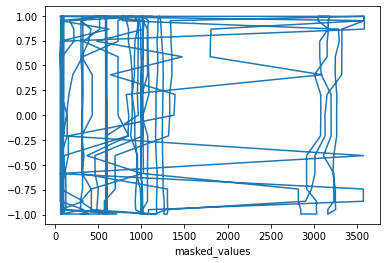

In [109]:
ffm.sin_30_1.plot()

<AxesSubplot: xlabel='masked_values'>

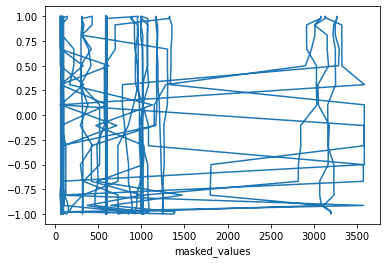

In [111]:
ffm.cos_30_1.plot()

#### Hens and Dog

In [112]:
ffm1 = fourier_features(cdf1.masked_values)

<AxesSubplot: xlabel='masked_values'>

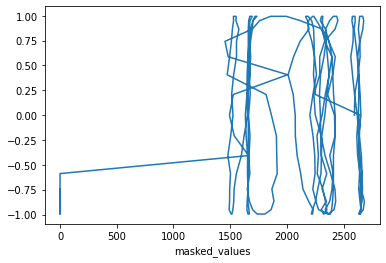

In [113]:
ffm1.sin_30_1.plot()

<AxesSubplot: xlabel='masked_values'>

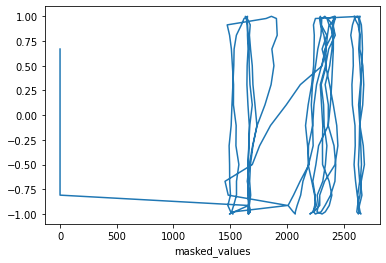

In [114]:
ffm1.cos_30_1.plot()

#### Blue Green Fade

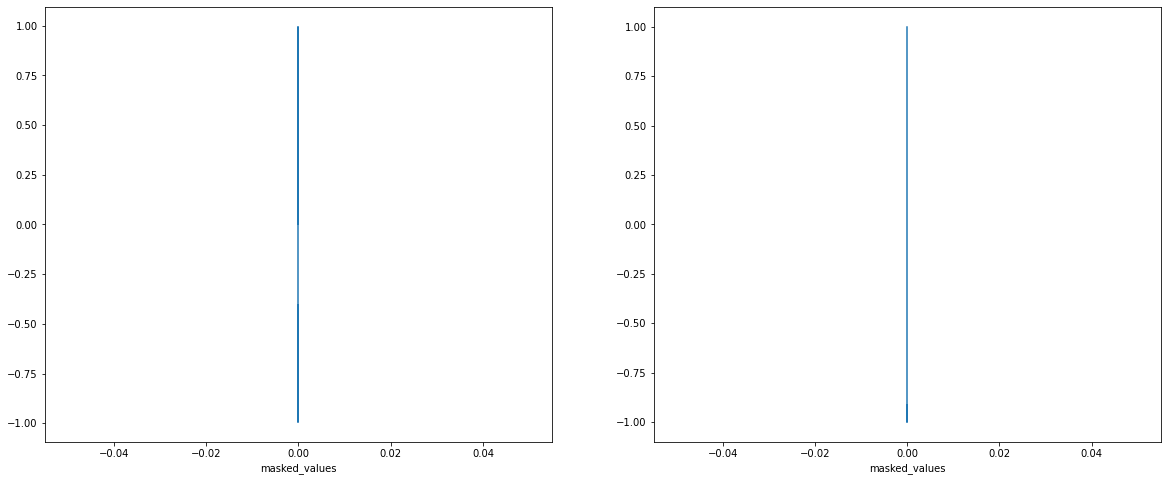

In [117]:
ffm2 = fourier_features(cdf2.masked_values)
plt.figure(figsize=(20, 8))
plt.subplot(121)
ffm2.sin_30_1.plot()
plt.subplot(122)
ffm2.cos_30_1.plot()
plt.show()

### Masked difference between frames

#### Pokemon

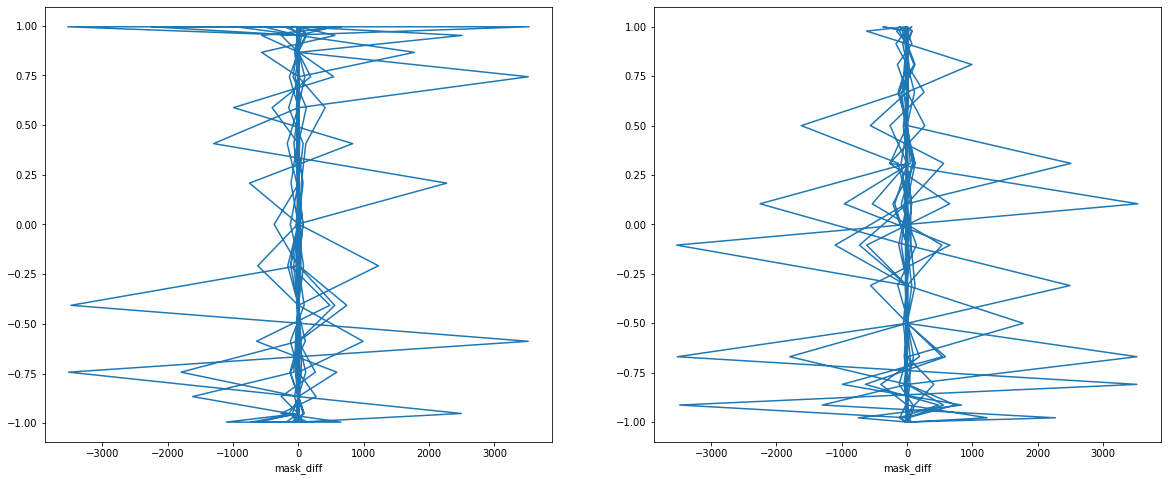

In [118]:
ffmd = fourier_features(cdf.mask_diff)
plt.figure(figsize=(20, 8))
plt.subplot(121)
ffmd.sin_30_1.plot()
plt.subplot(122)
ffmd.cos_30_1.plot()
plt.show()

#### Hens and Dog

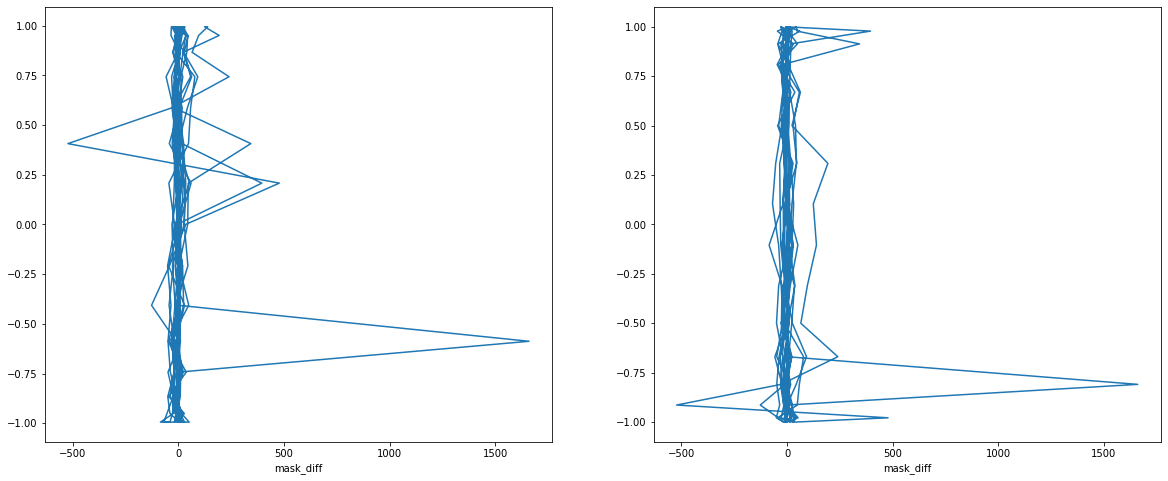

In [119]:
ffmd1 = fourier_features(cdf1.mask_diff)
plt.figure(figsize=(20, 8))
plt.subplot(121)
ffmd1.sin_30_1.plot()
plt.subplot(122)
ffmd1.cos_30_1.plot()
plt.show()

#### Blue Green Fade

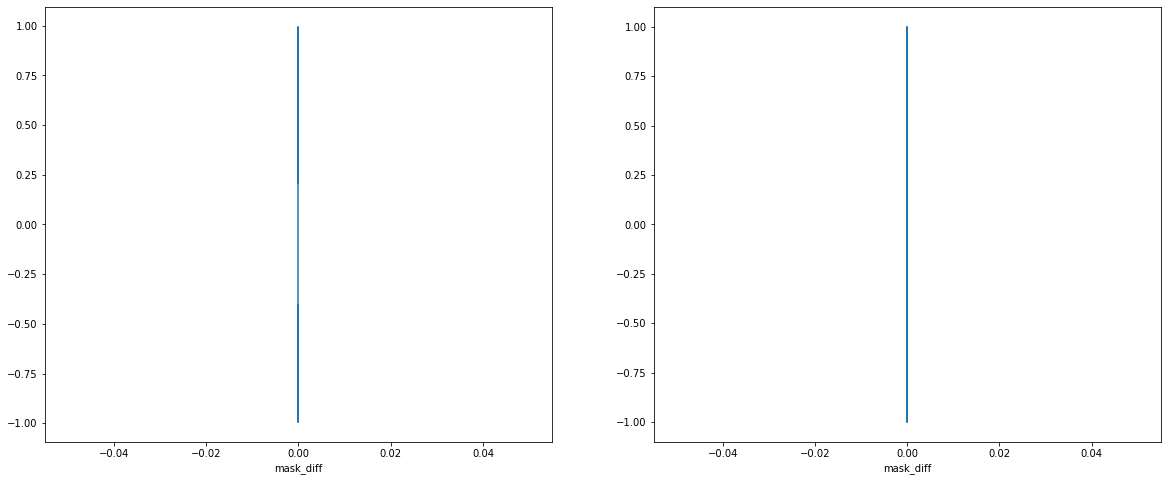

In [120]:
ffmd2 = fourier_features(cdf2.mask_diff)
plt.figure(figsize=(20, 8))
plt.subplot(121)
ffmd2.sin_30_1.plot()
plt.subplot(122)
ffmd2.cos_30_1.plot()
plt.show()